<a href="https://colab.research.google.com/github/jsebastianquiroga/DEEP_LEARNING_PUJ/blob/main/Traffic_sign/notebook/Taller_2_Caicedo_Garc%C3%ADa_Quiroga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Aprendizaje Profundo.</strong></h1> 
<h2> Para: Ing. Julio Omar Palacio Niño, M.Sc.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Antonio Jose Caicedo.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>
<h2>Leonardo García.</br></h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Taller 2: Traffic Sign Classification and Recognition.</strong></h1> 

En este notebook exploraremos diferentes propuestas de redes convolucionales para el reconocimiento y clasificación de señales de tráfico. Para ello, utilizaremos el conjunto de datos "Traffic Sign Classification and Recognition", que contiene más de 6.000 imágenes etiquetadas manualmente en 10 categorías diferentes, que incluyen señales de guía, señales de velocidad máxima y señales de prioridad, entre otras.

El conjunto de datos se encuentra dividido en un conjunto de entrenamiento y un conjunto de prueba, cada uno con su respectivo archivo de anotaciones en formato JSON. En este notebook, implementaremos diferentes arquitecturas de redes convolucionales utilizando la biblioteca Keras, y evaluaremos su rendimiento en términos de precisión y pérdida.

El objetivo de este proyecto es explorar diferentes técnicas y arquitecturas de redes convolucionales para mejorar el reconocimiento y clasificación de señales de tráfico.

En el presente Notebook, se exploraran los datos del data set de Kaggel: https://www.kaggle.com/datasets/wjybuqi/traffic-sign-classification-and-recognition

Este conjunto de datos contiene 6358 etiquetas de categorías etiquetadas manualmente. Las etiquetas incluyen las 10 categorías siguientes: `GuideSign`, `M1`, `M4`, `M5`, `M6`, `M7`, `P1`, `P10_50`, `P12`, `W1`, correspondientes a diez categorías diferentes de señales de tráfico. Todos los datos se han dividido manualmente en conjunto de entrenamiento y conjunto de prueba según la proporción.

<table>
  <tr>
    <th>Categoría</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Guidesign</td>
    <td>Refiere al diseño y la colocación de señales de tráfico para guiar y orientar a los conductores y peatones en la vía pública.</td>
  </tr>
  <tr>
    <td>M1</td>
    <td>Señales de tráfico que indican la dirección a seguir, como flechas de dirección y señales de carril para la entrada y salida de carriles.</td>
  </tr>
  <tr>
    <td>M4</td>
    <td>Señales de tráfico que se colocan a lo largo de los carriles de tráfico para proporcionar información específica sobre los carriles de la carretera.</td>
  </tr>
  <tr>
    <td>M5</td>
    <td>Señales de tráfico que indican la presencia de una carretera o un camino, y las restricciones o regulaciones que se aplican a los vehículos en la misma.</td>
  </tr>
  <tr>
    <td>M6</td>
    <td>Señales de tráfico específicas para ciclistas que indican carriles o áreas exclusivas para bicicletas.</td>
  </tr>
  <tr>
    <td>M7</td>
    <td>Señales de tráfico que indican la presencia de un paso de peatones y que alertan a los conductores para reducir la velocidad y ceder el paso a los peatones.</td>
  </tr>
  <tr>
    <td>P1</td>
    <td>Señales de tráfico que indican una prohibición o restricción, como una señal de "prohibido estacionarse" o una señal de "prohibido girar a la izquierda".</td>
  </tr>
  <tr>
    <td>P10_50</td>
    <td>Señales de tráfico que indican los límites de velocidad máxima en una determinada carretera o calle.</td>
  </tr>
  <tr>
    <td>P12</td>
    <td>Señales de tráfico que indican una cortesía o sugerencia, como una señal de "cambio de carril sugerido" o una señal de "ceda el paso".</td>
  </tr>
  <tr>
    <td>W1</td>
    <td>Señales de tráfico que indican peligros o advertencias en la carretera, como señales de "curva peligrosa" o señales de "cruce de animales".</td>
  </tr>
</table>

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> Cargue y preparación del data set  </li>
<li> Exploración del data set y su comprención . </li>
<li> Modelo 1.</li>
<li> Modelo 2.</li>
<li> Analisis de resultados redes.</li>
<li> Bono.</li>
</ol>

 <a id="carque"></a>
# 1. Cargue del data set.

In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

# Importar las liobrerías y paquetes
import os
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

from matplotlib.image import imread
# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


Las imágenes que se utilizarán en este proyecto ya han sido segmentadas previamente en la competencia de Kaggle. Para su uso en este proyecto, las imágenes han sido cargadas en un drive público. Se cargarán las bases de datos tal como fueron proporcionadas en la competencia.

In [ ]:
folder = '18VNhiT-PPcYOsfpX1TN66ektcXl3BShn'
download = drive.CreateFile({'id': folder})
download.GetContentFile('traffic-sings.zip') # Guarda las imagenes en un archivo temporal

!unzip -q traffic-sings.zip -d dataset | head -n 5

PATH = '/content/dataset'

print(os.listdir(PATH))

train_dir = os.path.join(PATH, 'train_dataset', 'train')
test_dir = os.path.join(PATH, 'test_dataset', 'test')

El código descarga un archivo zip de un conjunto de datos sobre señales de tráfico desde Google Drive. Luego descomprime el archivo en una carpeta llamada "dataset". Se establece el directorio de entrenamiento y prueba para el modelo y se definen los parámetros para el preprocesamiento de imágenes utilizando ImageDataGenerator. En particular, las imágenes se escalan entre 0 y 1 y se establece el parámetro class_mode en "categorical" para admitir múltiples clases. Finalmente, se utiliza flow_from_directory para crear generadores de lotes de datos para entrenamiento y prueba.

In [5]:
from keras.preprocessing.image import ImageDataGenerator 

#valores  de entrada:

pixel= 224 #imagenes de 150 pixeles
size=20
epocas=10
batch = 200

train_datagen = ImageDataGenerator(rescale = 1./255) #escalar entre 0-1
validation_datagen = ImageDataGenerator(rescale = 1./255) #escalar entre 0-1
test_datagen = ImageDataGenerator(rescale = 1./255) #escalar entre 0-1

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_dir,             # Directorio que contiene las imágenes de entrenamiento
    target_size=(pixel, pixel),    # Tamaño de la imagen después de reescalarla
    color_mode="rgb",       # Tipo de imagen: RGB o grayscale
    batch_size=size,        # Número de imágenes por lote generado por el generador
    class_mode='categorical',   # Categórico para múltiples clases, binario para dos clases
    shuffle=True,           # Mezcla el orden de las imágenes producidas
    seed=42                 # Semilla aleatoria para reproducibilidad
)
test_generator = test_datagen.flow_from_directory(
    test_dir,             # Directorio que contiene las imágenes de entrenamiento
    target_size=(pixel, pixel),    # Tamaño de la imagen después de reescalarla
    color_mode="rgb",       # Tipo de imagen: RGB o grayscale
    batch_size=size,        # Número de imágenes por lote generado por el generador
    class_mode='categorical',   # Categórico para múltiples clases, binario para dos clases
    shuffle=True,           # Mezcla el orden de las imágenes producidas
    seed=42                 # Semilla aleatoria para reproducibilidad
)

Found 6024 images belonging to 10 classes.
Found 324 images belonging to 10 classes.


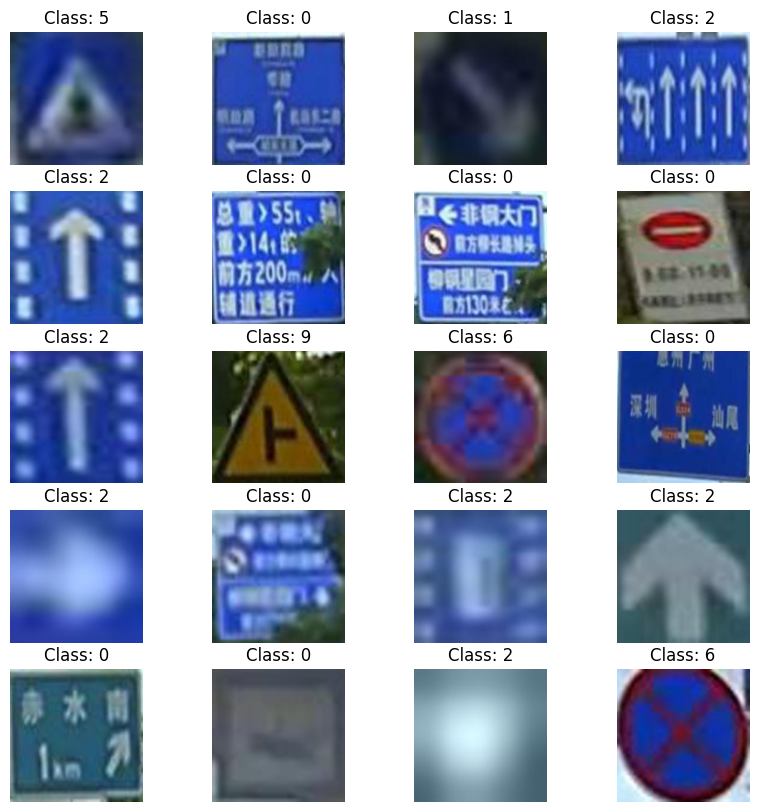

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener un lote de imágenes y etiquetas generadas por el generador
x_batch, y_batch = train_generator.next()

# Convertir las etiquetas a etiquetas numéricas (clases)
y_classes = np.argmax(y_batch, axis=1)

# Visualizar las imágenes con sus respectivas etiquetas
plt.figure(figsize=(10, 10))
for i in range(size):
    plt.subplot(5, 4, i+1)
    plt.imshow(x_batch[i])
    plt.title("Class: " + str(y_classes[i]))
    plt.axis('off')
plt.show()


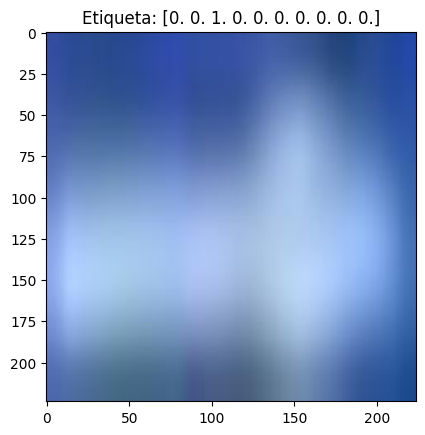

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener un lote de imágenes de prueba y etiquetas
x_batch, y_batch = test_generator.next()

# Seleccionar una imagen al azar del lote
random_index = np.random.randint(0, len(x_batch))
image = x_batch[random_index]
label = y_batch[random_index]

# Visualizar la imagen seleccionada y su etiqueta
plt.imshow(image)
plt.title(f"Etiqueta: {label}")
plt.show()


In [64]:
y_train = train_generator.classes
y_train[500]

0

In [56]:
category_indices = [np.where(y_train == i)[0][0] for i in range(10)]
category_labels = range(10)
# Plot examples
plt.figure(figsize=(10, 10))
for i, index in enumerate(category_indices):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[index]))
    plt.xlabel(category_labels[y_train[index]])
plt.show()


IndexError: ignored

In [55]:
y_classes.max()

9

In [57]:
x_train

NameError: ignored

In [58]:
y_classes.classes

AttributeError: ignored